In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [24]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\figure task 4.xlsx")
print(batch)

    feed P (psig)  Feed Rot (mm)  feed flow (sccm)  Per. P (psig)  \
0            64.0           94.0           37600.0            0.0   
1            66.0           74.5           29800.0            0.0   
2            67.0           54.5           21800.0            0.0   
3            68.0           37.0           14800.0            0.0   
4            69.0           18.0            7200.0            0.0   
5            69.0           19.0            7600.0            0.0   
6            68.0           17.5            7000.0            0.0   
7            68.0           13.5            5400.0            0.0   
8            68.0           11.5            4600.0            0.0   
9            69.0            8.0            3200.0            0.0   
10            NaN            NaN               NaN            NaN   

    Per. Rot (mm)  Per. flow (sccm)  Per. O2%  ret. P (psig)  ret. Rot  \
0            94.5            4725.0      44.1           62.0     140.0   
1            96.0      

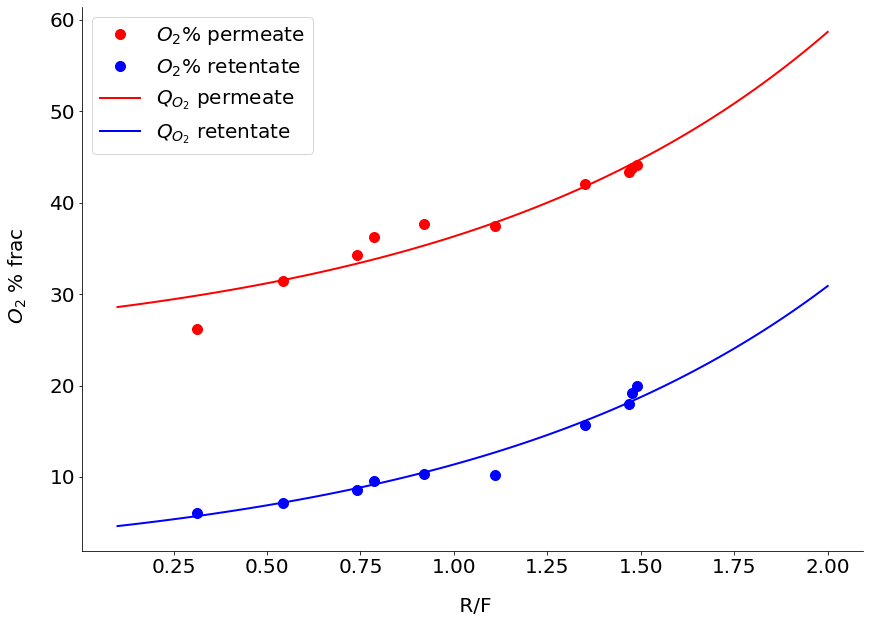

In [30]:
fig, ax1 = plt.subplots(figsize = (14, 10))
#total flux at permeate
#batch = batch_a[(batch_a["ret. O2%"] < 14) & (batch_a["ret. O2%"] >8)]
#batch1 = batch1_a[(batch1_a["ret. O2%"] < 14)& (batch_a["ret. O2%"] >8)]
n = 1
lw = 10
#ax2 = ax1.twinx()
a1 = 4.79
b1 = 23.29
x = np.linspace(0.1,2,100)
y = a1*np.exp(x)+b1

a2 = 4.18
b2 = 0
y1 = a2*np.exp(x)+b2
m1 = ax1.plot(batch["R/F"],(batch["Per. O2%"]),'ro', markersize = lw, label = "$O_2$% permeate") #purity
m2 = ax1.plot(x,y, 'r-', linewidth = 2, label = "$Q_{O_2}$ permeate")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)
#m2 =ax2.plot(batch1[batch1["s"] == "For 75 psig"]["feed flow (sccm)"],batch1[batch1["s"] == "For 75 psig"]["N2_recov"],'bo', markersize = lw, label = "75 psig - recov") #recov

m3 =ax1.plot(batch["R/F"],(batch["ret. O2%"]),'bo', markersize = lw, label = "$O_2$% retentate") #purity
m4 = ax1.plot(x,y1, 'b-', linewidth = 2, label = "$Q_{O_2}$ retentate")
#ax2.plot(batch["feed flow (sccm)"],batch["N2 (ret)"],'bo', markersize = lw)
#m4 = ax2.plot(batch1[batch1["s"] == "For 90 psig"]["feed flow (sccm)"],batch1[batch1["s"] == "For 90 psig"]["N2_recov"],'b*', markersize = lw, label = "90 psig - recov") #recov


lns = m1+m3+m2+m4
labs = [l.get_label() for l in lns]

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

legend = ax1.legend(lns, labs, loc = 'best', fontsize = 20)
#legend = ax2.legend(ncol = 1, loc = 6, fontsize = 20)
ax1.set_ylabel(r" $O_2$ % frac", fontsize = 20,labelpad=20, color = 'k')
#ax2.set_ylabel(r" $N_2%$ % recovery", fontsize = 20, labelpad = 20, color = 'b')
ax1.set_xlabel(r" R/F",fontsize = 20,labelpad=20)
#ax2.set_ylim(0,93)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')